In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-1/train/Sample060/img060-003.png
/kaggle/input/dataset-1/train/Sample060/img060-024.png
/kaggle/input/dataset-1/train/Sample060/img060-051.png
/kaggle/input/dataset-1/train/Sample060/img060-048.png
/kaggle/input/dataset-1/train/Sample060/img060-039.png
/kaggle/input/dataset-1/train/Sample060/img060-002.png
/kaggle/input/dataset-1/train/Sample060/img060-004.png
/kaggle/input/dataset-1/train/Sample060/img060-055.png
/kaggle/input/dataset-1/train/Sample060/img060-023.png
/kaggle/input/dataset-1/train/Sample060/img060-029.png
/kaggle/input/dataset-1/train/Sample060/img060-050.png
/kaggle/input/dataset-1/train/Sample060/img060-017.png
/kaggle/input/dataset-1/train/Sample060/img060-031.png
/kaggle/input/dataset-1/train/Sample060/img060-046.png
/kaggle/input/dataset-1/train/Sample060/img060-033.png
/kaggle/input/dataset-1/train/Sample060/img060-007.png
/kaggle/input/dataset-1/train/Sample060/img060-032.png
/kaggle/input/dataset-1/train/Sample060/img060-008.png
/kaggle/in

/kaggle/input/dataset-1/train/Sample015/img015-006.png
/kaggle/input/dataset-1/train/Sample015/img015-047.png
/kaggle/input/dataset-1/train/Sample015/img015-013.png
/kaggle/input/dataset-1/train/Sample015/img015-054.png
/kaggle/input/dataset-1/train/Sample015/img015-002.png
/kaggle/input/dataset-1/train/Sample015/img015-049.png
/kaggle/input/dataset-1/train/Sample015/img015-003.png
/kaggle/input/dataset-1/train/Sample015/img015-017.png
/kaggle/input/dataset-1/train/Sample015/img015-025.png
/kaggle/input/dataset-1/train/Sample015/img015-053.png
/kaggle/input/dataset-1/train/Sample015/img015-012.png
/kaggle/input/dataset-1/train/Sample015/img015-051.png
/kaggle/input/dataset-1/train/Sample015/img015-022.png
/kaggle/input/dataset-1/train/Sample015/img015-034.png
/kaggle/input/dataset-1/train/Sample015/img015-004.png
/kaggle/input/dataset-1/train/Sample015/img015-028.png
/kaggle/input/dataset-1/train/Sample015/img015-039.png
/kaggle/input/dataset-1/train/Sample015/img015-024.png
/kaggle/in

/kaggle/input/dataset-1/train/Sample006/img006-029.png
/kaggle/input/dataset-1/train/Sample006/img006-049.png
/kaggle/input/dataset-1/train/Sample006/img006-026.png
/kaggle/input/dataset-1/train/Sample006/img006-012.png
/kaggle/input/dataset-1/train/Sample006/img006-023.png
/kaggle/input/dataset-1/train/Sample006/img006-005.png
/kaggle/input/dataset-1/train/Sample006/img006-045.png
/kaggle/input/dataset-1/train/Sample006/img006-039.png
/kaggle/input/dataset-1/train/Sample006/img006-027.png
/kaggle/input/dataset-1/train/Sample006/img006-011.png
/kaggle/input/dataset-1/train/Sample006/img006-021.png
/kaggle/input/dataset-1/train/Sample006/img006-007.png
/kaggle/input/dataset-1/train/Sample006/img006-003.png
/kaggle/input/dataset-1/train/Sample006/img006-006.png
/kaggle/input/dataset-1/train/Sample006/img006-018.png
/kaggle/input/dataset-1/train/Sample006/img006-004.png
/kaggle/input/dataset-1/train/Sample006/img006-008.png
/kaggle/input/dataset-1/train/Sample006/img006-042.png
/kaggle/in

In [2]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2

In [3]:
# checking the count of images present in the dataset
total_images = 0
root_dir = "/kaggle/input/dataset-1/train"
for i in os.listdir(root_dir):
    print("Total no. of images present in",i,"are:",len(os.listdir(root_dir+"/"+i)))
    total_images+=len(os.listdir(root_dir+"/"+i))


Total no. of images present in Sample060 are: 40
Total no. of images present in Sample014 are: 40
Total no. of images present in Sample011 are: 40
Total no. of images present in Sample041 are: 40
Total no. of images present in Sample025 are: 40
Total no. of images present in Sample049 are: 40
Total no. of images present in Sample010 are: 40
Total no. of images present in Sample017 are: 40
Total no. of images present in Sample032 are: 40
Total no. of images present in Sample005 are: 40
Total no. of images present in Sample034 are: 40
Total no. of images present in Sample031 are: 40
Total no. of images present in Sample003 are: 40
Total no. of images present in Sample009 are: 40
Total no. of images present in Sample002 are: 40
Total no. of images present in Sample052 are: 40
Total no. of images present in Sample035 are: 40
Total no. of images present in Sample018 are: 40
Total no. of images present in Sample004 are: 40
Total no. of images present in Sample020 are: 40
Total no. of images 

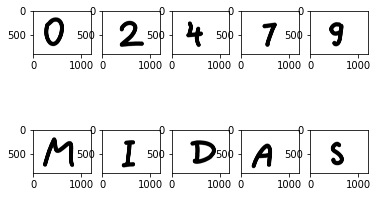

In [4]:
# plotting various images from the dataset.
plt.subplot(2, 5, 1)
plt.imshow(plt.imread(root_dir+"/Sample001/img001-001.png"))

plt.subplot(2,5,2)
plt.imshow(plt.imread(root_dir+"/Sample003/img003-002.png"))

plt.subplot(2,5,3)
plt.imshow(plt.imread(root_dir+"/Sample005/img005-001.png"))

plt.subplot(2,5,4)
plt.imshow(plt.imread(root_dir+"/Sample008/img008-002.png"))

plt.subplot(2,5,5)
plt.imshow(plt.imread(root_dir+"/Sample010/img010-002.png"))

plt.subplot(2,5,6)
plt.imshow(plt.imread(root_dir+"/Sample023/img023-001.png"))

plt.subplot(2,5,7)
plt.imshow(plt.imread(root_dir+"/Sample019/img019-001.png"))

plt.subplot(2,5,8)
plt.imshow(plt.imread(root_dir+"/Sample014/img014-001.png"))

plt.subplot(2,5,9)
plt.imshow(plt.imread(root_dir+"/Sample011/img011-001.png"))

plt.subplot(2,5,10)
plt.imshow(plt.imread(root_dir+"/Sample029/img029-002.png"))


plt.show()

(900, 1200, 3)


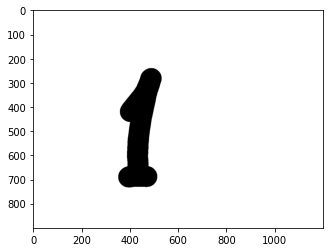

In [5]:
img = plt.imread(root_dir+"/Sample002/img002-001.png")
print(img.shape)
plt.imshow(img)
plt.show()

In [6]:
# checking the min and max pixel value. It is a good practise to normalize the pixel values
print("maximum pixel value of image:",img.max())
print("minimum pixel value of image:",img.min())

maximum pixel value of image: 1.0
minimum pixel value of image: 0.0


Conclusions:

1. For all the 62 category we only have 40 images. Depending on the performance of our model, we might need to apply data augmentation techniques to achieve more accuracy.
2. Initially, the images are of the shape 900x1200x3. As we can see from the random samples we have printed, there is a lot of unnceccsary padding in the images. This padding(white space) is mostly on the right side of the image. We can remove this padding which would improve our computation speed.
3. Normalizing the pixel values ensures that input parameters have a uniform distribution and thus helps in faster covergence. Since, the values are already normalized we don't need to modify the pixel values. [1]
4. Large image size implies added noise and variance that the neural network has to deal with. Which in turn also means that we would need more layers to achieve a greater accuracy. [2]
5. Since most of the input features are alligned towards the center, we can take a square crop of the center. This would also help us to tackle with problems mentioned in point 1 and point 3.[3]

It would optimal to apply the above transformations on the image while loading it into the numpy array. Another alternate would have been to either overwrite the images with their transformed version or create a new folder. Both of these methods are not efficient as we might end up with either loosing the data or unneccessarily increase the storage requirement.

## Loading the data and assigning the labels

---



For model training, we would require a list(X) in which our images are stores and another list(y) in which the class of respective images are stored.
Since the images are organised folder wise, we need to access the images from these folder append it into list X and subsequently append it's class to the list Y.

Data transformations, that were mentioned above, will be applied after storing the data into the list

Various machine learning frameworks require the input data and labels to be given as a numpy array. Since, retrieving data and transforming it is more accessible through list I have chosen to use that. The datatype will be changed to a numpy array after applying all the transformations.


Outline of stored data:


*   Sample001-Sample010: digits from 0 to 9
*   Sample011-Sample036: upper case alphabets a-z
*   Sample037-Sample062: small case alphabets A-Z

Learning logs:
1. It is to better to split data and append data in batches. Otherwise, we might encounter a runtime timeout error.
2. It is more optimal to use cv2 while reading the images. If we use up more than 12GB of RAM. By reading images through cv2 the RAM utilization by around 4GB. This happens because CV2 reads and stores the image as a numpy array rather than a list.

In [8]:
X = [] #list for storing image arrays
y = [] # list for storing the image labels

In [9]:
# storing digits from 0 to 9 first
count = 0 # count will be used to store the respective label
for i in sorted(os.listdir(root_dir)): 
    for j in os.listdir(root_dir + "/" + i): # accessing the folder
        X.append(cv2.imread(root_dir+"/" + i + "/" + j)) # accessing images in the respective folder
        y.append(str(count))

    count+=1 #incrementing the count/label 
    if(count==10): break # if all the images from 0 to 9 have been stored then break out of the loop
    

400
400
0 2 9


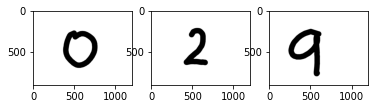

In [10]:
# sanity check
print(len(X))
print(len(y))

plt.subplot(1,3,1)
plt.imshow(X[0])

plt.subplot(1,3,2)
plt.imshow(X[80])

plt.subplot(1,3,3)
plt.imshow(X[399])


print(y[0],y[80],y[399])

In [11]:
# storing upper case alphabets (A-Z)
count = 65  #ascii value of A. We'll go till 90 i.e ascii value of Z

for i in sorted(os.listdir(root_dir))[10:]: #accessing folder after Sample010 i.e folders after the digit 9
    for j in os.listdir(root_dir + "/" + i):
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
        
    count+=1
    if(count==78): break #if we have accessed the Z folder then break the loop      

In [13]:
count = 78
for i in sorted(os.listdir(root_dir))[23:]: #accessing folder after Sample010 i.e folders after the alphabet m
    for j in os.listdir(root_dir + "/" + i):
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
        
    count+=1
    if(count==91): break #if we have accessed the Z folder then break the loop 

1440
1440
A M N Z


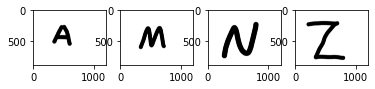

In [14]:
# sanity check
print(len(X))
print(len(y))

plt.subplot(1,4,1)
plt.imshow(X[401])

plt.subplot(1,4,2)
plt.imshow(X[880])

plt.subplot(1,4,3)
plt.imshow(X[959])


plt.subplot(1,4,4)
plt.imshow(X[1439])




print(y[401],y[880], y[959],y[1439])

In [15]:
# storing lower case alphabets (a-z)
count = 97  #ascii value of A. We'll go till 122 i.e ascii value of z

for i in sorted(os.listdir(root_dir))[36:]:#accessing folder after Sample036 i.e folders after the upper case alphabet Z
    for j in os.listdir(root_dir + "/" + i):        
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
            
        
    count+=1
    if(count==110): break #if we have accessed the z folder then break the loop  


In [16]:
count = 110
for i in sorted(os.listdir(root_dir))[49:]: #accessing folder after Sample048 i.e folders after the lower case alphabet m 
    for j in os.listdir(root_dir + "/" + i):
        X.append(cv2.imread(root_dir+"/" + i + "/" + j))
        y.append(chr(count))
    
        
    count+=1   
    if(count==123): break #if we have accessed the z folder then break the loop     

2480
2480
a m n z


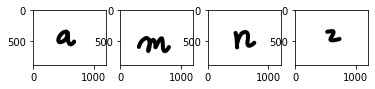

In [25]:
#sanity check
print(len(X))
print(len(y))

plt.subplot(1,4,1)
plt.imshow(X[1440])

plt.subplot(1,4,2)
plt.imshow(X[1959])

plt.subplot(1,4,3)
plt.imshow(X[1960])


plt.subplot(1,4,4)
plt.imshow(X[2479])




print(y[1440],y[1959], y[1960],y[2479])

Now, that we have organised our images, we'll apply various image transformations on the image for efficienct storage and computation.
1. As mentioned earlier, we'll take a centre square crop of the images. This is allow us to remove unneccessary padding, help the CNN to focus on important features and decrease our computation resources.
2. Also, all of the images are black and white images. Yet, they have a dimension of 900x1200x3. Therefore, it will be optimal to reshape the image to 900x1200. We would not loose any features by doing so.

Learning logs:
3. By observing various samples we can can conclude that most of the padding is towards the right of the images. A naive way of reducing the images would be to simply crop this space out by making an approximate guess. However, if we want an accurate analysis we can take the mean and stardard deviation across each pixel of all the images and then reduce the image accordingly.[2] 


(700, 700)


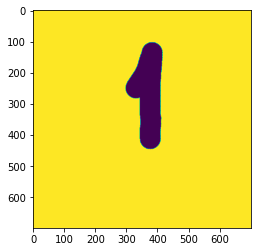

In [77]:
# For testing applying the above mentioned transformations to a single image
#(to keep things simple for me, I'll crop the images by taking an approximate guess :P)

#test_img = X[60]
# modified_img = cv2.cvtColor(X[60], cv2.COLOR_BGR2GRAY)
# modified_img = modified_img[100:800,200:900]

modified_img = cv2.cvtColor(X[60][100:800,200:900], cv2.COLOR_BGR2GRAY)
plt.imshow(modified_img)
print(modified_img.shape)

In [78]:
# Applying data transformation to all the images
for i in range(len(X)):
    X[i] = cv2.cvtColor(X[i][100:800,200:900], cv2.COLOR_BGR2GRAY)

In [79]:
# sanity check (checking if shape of the image has changed or not)
import random
for i in range(5):#checking for 5 random images
    print(X[random.randint(0,2479)].shape)


(700, 700)
(700, 700)
(700, 700)
(700, 700)
(700, 700)


## ---------- END OF DATA PREPROCESSING ----------

Citations:
1. [1]: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/#:~:text=Normalize%20Pixel%20Values,-For%20most%20image&text=As%20such%20it%20is%20good,images%20can%20be%20viewed%20normally.
2. [2]: https://becominghuman.ai/image-data-pre-processing-for-neural-networks-498289068258#:~:text=Normalizing%20image%20inputs%3A%20Data%20normalization,faster%20while%20training%20the%20network.
3. [3]: https://datascience.stackexchange.com/questions/16601/reason-for-square-images-in-deep-learning
4. [4]: https://towardsdatascience.com/a-hitchhiker-guide-to-python-numpy-arrays-9358de570121#:~:text=with%20mathematical%20calculations.-,1.,further%20optimisation%20of%20the%20code.       